# Sales Analysis

In [38]:
#### Import necessary libraries & read csv file 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv("all_data.csv")



In [2]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NAN 

In [3]:
df = df.dropna()

### Get rid of text in "order date" column and then convert it into datetime

In [11]:
# df["Order Date"] = df["Order Date"].str.replace("Order Date: ","")
df = df[df['Order Date'].str[0:2]!='Or']


In [12]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\shyma\AppData\Local\Temp\ipykernel_18612\13081262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [13]:
df["Order ID"]= pd.to_numeric(df["Order ID"] , downcast= "integer")
df["Order ID"]

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185950, dtype: int32

In [14]:
df["Quantity Ordered"]= pd.to_numeric(df["Quantity Ordered"] , downcast= "integer")
df["Quantity Ordered"]

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int8

In [15]:
df["Price Each"]= pd.to_numeric(df["Price Each"] , downcast= "float")
df["Price Each"]

0          11.950000
2          99.989998
3         600.000000
4          11.990000
5          11.990000
             ...    
186845      2.990000
186846    700.000000
186847    700.000000
186848    379.989990
186849     11.950000
Name: Price Each, Length: 185950, dtype: float32

### Augment data with additional columns

In [16]:
#### Add month column

df["Month"]=df["Order Date"].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [17]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
# df['City'] = '' 
# city1 = df["Purchase Address"].astype(str).str.split(",")

# state = df["Purchase Address"].astype(str).str.split(" ")


def get_city(x):
    return x['Purchase Address'].split(',')[1] + '(' + x['Purchase Address'].split(' ')[4]+')'

df['City'] = df.apply(get_city, axis=1)
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)"
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles(Angeles,)"
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco(Francisco,)"
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"San Francisco(Francisco,)"
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"San Francisco(Francisco,)"


## Data Exploration!

In [18]:
#### Question 1: What was the best month for sales? How much was earned that month? 12
 
## sales = Quantity_order x price Each
df["sales"]= df["Quantity Ordered"]*df["Price Each"]
df.groupby('Month')['sales'].sum()


Month
1     1822256.75
2     2202022.50
3     2807100.25
4     3390670.25
5     3152606.75
6     2577802.25
7     2647775.75
8     2244467.75
9     2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: sales, dtype: float32

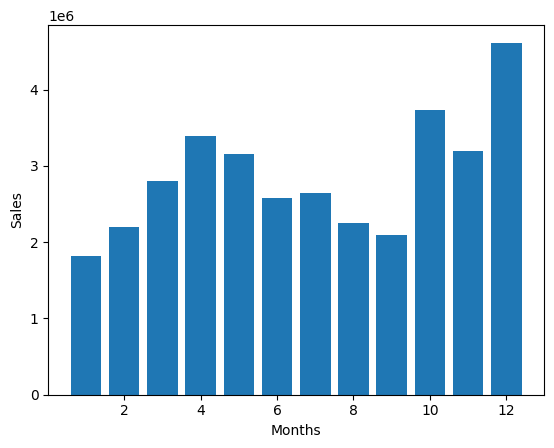

In [19]:
keym = (df.groupby('Month')['sales'].sum()).index
plt.bar(keym,df.groupby('Month')['sales'].sum())

plt.ylabel('Sales')
plt.xlabel('Months')
plt.show()

In [20]:
#### Question 2: What city sold the most product? San Francisco
# df.groupby('Product')['sales'].sum()
df.groupby(['City'])['sales'].sum()

City
 Atlanta(GA)                  2.795498e+06
 Austin(TX)                   1.819582e+06
 Boston(MA)                   3.661642e+06
 Dallas(TX)                   2.767976e+06
 Los Angeles(Angeles,)        5.452571e+06
 New York City(York)          4.664318e+06
 Portland(ME)                 4.497583e+05
 Portland(OR)                 1.870732e+06
 San Francisco(Francisco,)    8.262204e+06
 Seattle(WA)                  2.747756e+06
Name: sales, dtype: float32

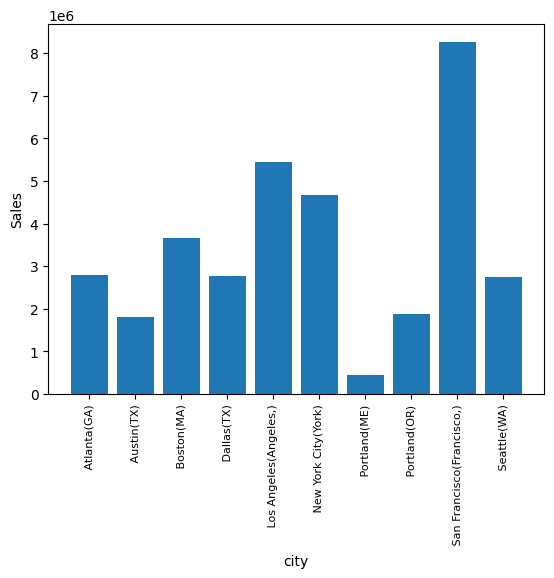

In [21]:
key = (df.groupby('City')['sales'].sum()).index
plt.bar(key, df.groupby('City')['sales'].sum()) 
plt.xticks(key, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('city')
plt.show()


In [22]:
 #### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? 19
## Step1: Add hour column
df["hours"]=df["Order Date"].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,sales,hours
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.900000,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.989998,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",600.000000,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",11.990000,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",11.990000,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles(Angeles,)",8.970000,20
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",700.000000,16
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",700.000000,7
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",379.989990,17


In [23]:
## Step2: show by using plot , get the most hour which clients make orders
df.groupby('hours')['Quantity Ordered'].sum()

hours
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

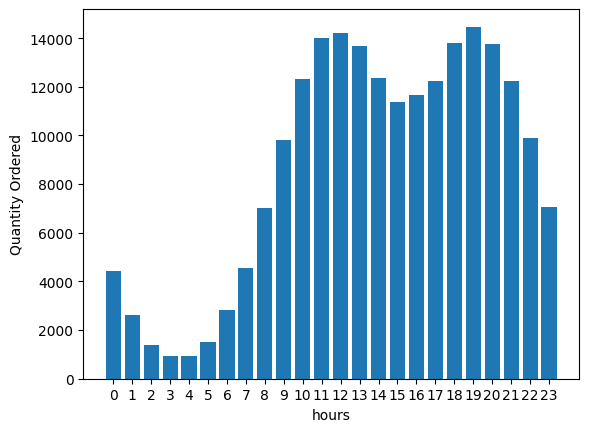

In [24]:
keyh = (df.groupby('hours')['Quantity Ordered'].sum()).index
plt.bar(keyh,df.groupby('hours')['Quantity Ordered'].sum())
plt.xlabel('hours')
plt.ylabel('Quantity Ordered')
plt.xticks(keyh)
x_ticks = plt.xticks()[1]

In [25]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,sales,hours
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.900000,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.989998,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",600.000000,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",11.990000,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles(Angeles,)",11.990000,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles(Angeles,)",8.970000,20
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",700.000000,16
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",700.000000,7
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"San Francisco(Francisco,)",379.989990,17


In [26]:
#### Question 4: What products are most often sold together?
df1 = df[df['Order ID'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1


C:\Users\shyma\AppData\Local\Temp\ipykernel_18612\1822609990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [29]:
index_df = df1.index.to_frame('index')
df1 = pd.merge(df1['Grouped'], index_df,  
               left_index=True, right_index=True)

In [32]:
sum1 = df1.groupby('Grouped')[0].sum()
index_df = sum1.index.to_frame('index')  
df3 = pd.merge(index_df, sum1, 
               left_index=True, right_index=True)
df3.max()

Grouped    iPhone,iPhone
0               81176406
dtype: object

In [33]:
#### What product sold the most? Why do you think it sold the most? AAA Batteries (4-pack)
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

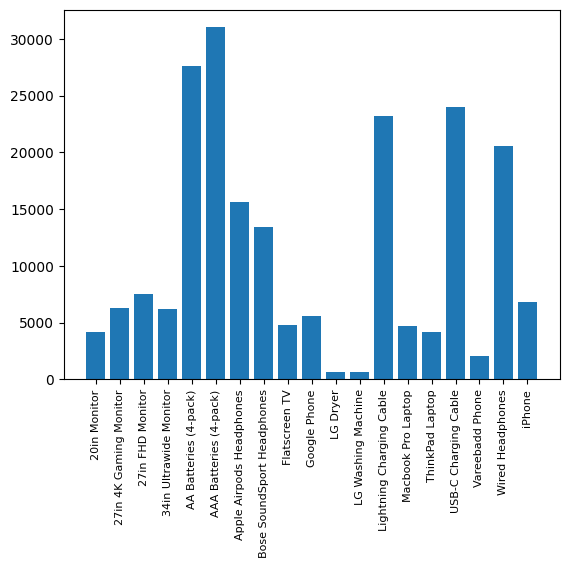

In [34]:
key = (df.groupby('Product')['Quantity Ordered'].sum()).index
plt.bar(key,df.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(key, rotation='vertical', size=8)
plt.show()

In [35]:
df['Product']

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 185950, dtype: object

In [36]:
df2 = pd.merge(df['Product'], df['Price Each'],  
               left_index=True, right_index=True)
df2 = df2.drop_duplicates()
df2

,Product,Price Each
0,USB-C Charging Cable,11.950000
2,Bose SoundSport Headphones,99.989998
3,Google Phone,600.000000
4,Wired Headphones,11.990000
9,Macbook Pro Laptop,1700.000000
12,Lightning Charging Cable,14.950000
13,27in 4K Gaming Monitor,389.989990
14,AA Batteries (4-pack),3.840000
16,Apple Airpods Headphones,150.000000
20,AAA Batteries (4-pack),2.990000


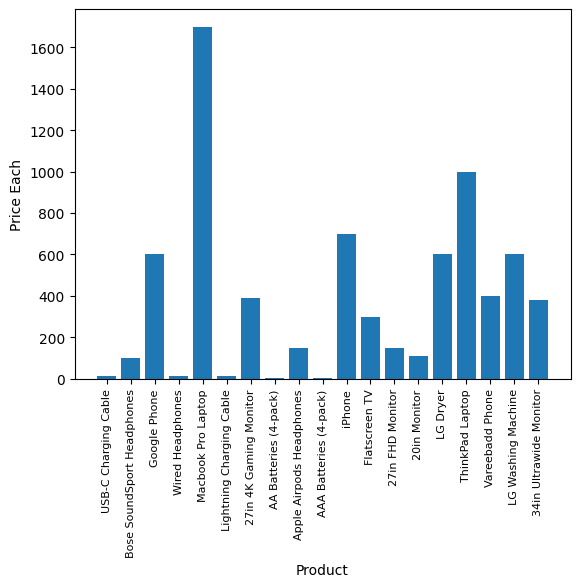

In [37]:
# plt.bar(key,df.groupby('Product')['Price Each'].sum())
plt.bar(df2['Product'], df2['Price Each'])  
plt.xlabel("Product")
plt.ylabel("Price Each")
plt.xticks(key, rotation='vertical', size=8)
plt.show()

In [ ]:
# maybe beacouse AAA Batteries (4-pack) is cheaper one